Olá, Heury

Meu nome é Ramon. Ao ao longo do texto farei algumas observações sobre melhorias no código. Nas partes em que não houver comentários, está tudo certo, ok? Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender os meus feedbacks no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítco, mas que pode ser corrigido para melhoria geral no seu código/análise
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser consertado, caso contrário seu projeto **não** será aceito.
</div>

Você pode me responder usando isso:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

###

<div class="alert alert-block alert-success">
<b>Comentário Geral do Revisor</b> <a class="tocSkip"></a>

Obrigado por enviar seu projeto. 
    
Parabéns, você fez um bom trabalho.

Como pontos fortes do projeto, destaco:
- Código simples e eficiente (sem loop desnecessário)
- Uso adequado dos recursos da lição
- Apresentação elegante, com perguntas e respostas, conclusão e recomendação.

Não tenho sugestão de melhorias. Parabéns. Desejo sucesso na jornada.


</div>





# PROJETO SPRINT 10: "Relatar uma História usando Dados"

# 1 - Carregamento e preparação dos dados

In [2]:
#Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
#Carregando datasets necessários
rest_data = pd.read_csv('/datasets/rest_data_us_upd.csv')

#Verificando as informações gerais do dataframe
rest_data.info()
print()
#Imprimindo as primeiras linhas do dataframe
print(rest_data.head())

#Verificando valores duplicados
duplicate_rows = rest_data.duplicated().sum()
print()
print(f'Quantidade de Valores duplicados:{duplicate_rows}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB

      id          object_name                  address  chain object_type  \
0  11786  HABITAT COFFEE SHOP   3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD 253  False   Fast Food   
3  11789    TRINITI ECHO PARK       1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN       2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3 

<div class="alert alert-block alert-info">
A princípio os tipos de dados de cada coluna estão corretos, com exceção da coluna chain, que parece ser do tipo boleano. <br>
A coluna chain também possui dados ausentes.<br>
Não há valores duplicados.
</div>

In [4]:
#Convertendo a coluna chain para dados booleanos
rest_data['chain'] = rest_data['chain'].astype(bool)

#Preenchendo os valores ausentes da coluna 'chain' com False (assumindo que a ausência quer dizer "não é parte de uma cadeia")
rest_data['chain'] = rest_data['chain'].fillna(False)

#Lendo novamente as informações
rest_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9651 non-null   bool  
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: bool(1), int64(2), object(3)
memory usage: 386.5+ KB


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

substituição de nan deve ser feita por com cuidado. às vezes, é melhor deixar como nan para não introudzir viés

</div>

# 2 - Análise e exibição dos dados

In [5]:
#definindo o estilo dos gráficos
plt.style.use("ggplot")
sns.set_palette("pastel")

In [6]:
#verificando os valores únicos
unique_values = rest_data['object_type'].unique()
print(unique_values)


['Cafe' 'Restaurant' 'Fast Food' 'Bakery' 'Bar' 'Pizza']


Restaurant = 75.17%
Fast Food = 11.05%
Cafe = 4.51%
Pizza = 3.32%
Bar = 3.03%
Bakery = 2.93%


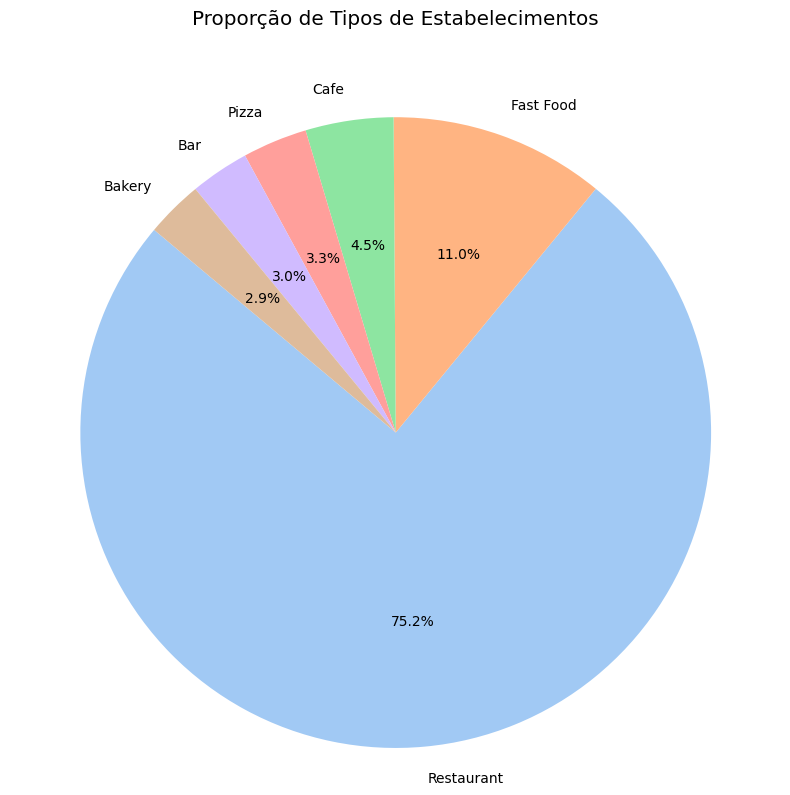

In [7]:
#Calculando a proporção para cada segmento
object_type_absolute = rest_data['object_type'].value_counts()
object_type_relative = object_type_absolute / len(rest_data)

# Imprimindo as proporções de cada segmento
for tipo, proporcao in object_type_relative.items():
    print(f"{tipo} = {proporcao:.2%}")

# Gerando o gráfico das proporções

plt.figure(figsize=(8, 8))
plt.pie(
    object_type_relative,
    labels=object_type_relative.index,
    autopct='%1.1f%%',
    startangle=140,
    normalize=True  # evitar warning
)
plt.title("Proporção de Tipos de Estabelecimentos", y=1.08)  # Ajusta a altura do título
plt.axis('equal')
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
Podemos notar que o setor de restaurantes domina o mercado, seguido à distância por fast food. Já os demais tipos: cafés, pizzarias, bares e padarias, representam nichos importantes, mas com menor representatividade.</div>



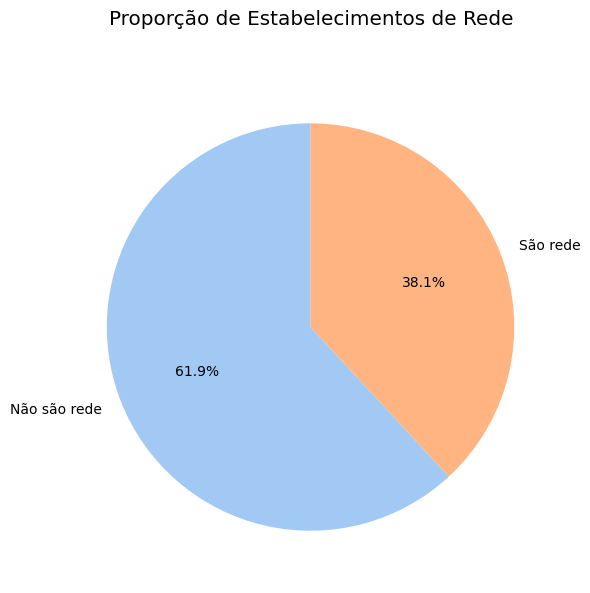

In [8]:
# Recontando os valores da coluna 'chain' (se são rede ou não)
chain_counts = rest_data['chain'].value_counts(normalize=True)
chain_proportions = chain_counts / len(rest_data)

# Rótulos para o gráfico
labels = ['Não são rede', 'São rede']

# Gráfico de pizza
plt.figure(figsize=(6, 6))
plt.pie(
    chain_counts,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    normalize=True
)
plt.title("Proporção de Estabelecimentos de Rede", y=1.08)
plt.axis('equal')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Dica: você pode usar value_counts(normalize=True) para pegar as proporções

</div>

<div class="alert alert-block alert-info">
A maioria dos estabelecimentos não faz parte de uma rede, ou seja, são negócios independentes. 
Ainda assim, a presença de redes é significativa, representando quase 4 em cada 10 estabelecimentos.<br><br>
<b>Vamos verificar qual tipo de estabelecimento é típico para redes.</div>

In [9]:
# Filtrando apenas os estabelecimentos que fazem parte de rede
chain_types = rest_data[rest_data['chain'] == True]['object_type'].value_counts(normalize=True)

# Identificando o tipo mais comum e sua proporção
typical_chain_type = chain_types.idxmax()
typical_chain_proportion = chain_types.max()

# Mostrar resultado
print(f"Tipo típico de estabelecimento para redes: {typical_chain_type} ({typical_chain_proportion:.2%})")

Tipo típico de estabelecimento para redes: Restaurant (62.35%)


<div class="alert alert-block alert-info">Apesar da diversidade de tipos, as redes estão concentradas principalmente em restaurantes tradicionais. <br><br>
<b>Agora vamos verificar o seguinte: <br>
O que caracteriza redes: muitos estabelecimentos com um pequeno número de assentos ou poucos estabelecimentos com muitos assentos?</div>

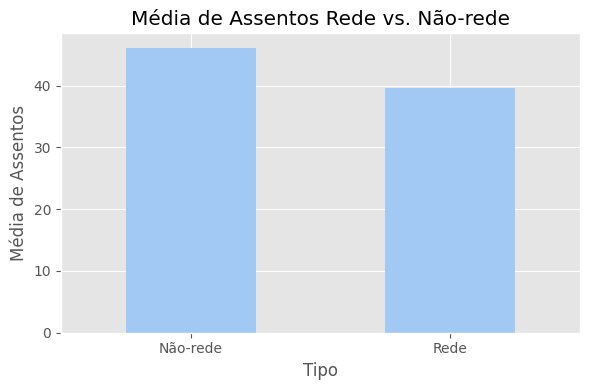

In [10]:
# Agrupandor os dados por 'chain' e calculando:
# - a média de assentos por estabelecimento
# - a quantidade total de estabelecimentos

network_characteristics = rest_data.groupby('chain').agg(
    media_assentos=('number', 'mean'),
    qtd_estabelecimentos=('id', 'count')
)

# Renomeando o índice para facilitar a leitura (True = Rede, False = Não-rede)
network_characteristics.index = network_characteristics.index.map({True: 'Rede', False: 'Não-rede'})

# Exibindo o resultado
network_characteristics

#Criando um gráfico
plt.figure(figsize=(6, 4))
network_characteristics['media_assentos'].plot(kind='bar')
plt.title('Média de Assentos Rede vs. Não-rede')
plt.ylabel('Média de Assentos')
plt.xlabel('Tipo')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-info">Parece que as redes são caracterizadas por muitos estabelecimentos com um número menor de assentos.<br><br>
<b>Agora, vamos determinar o número médio de assentos para cada tipo de restaurante. </div>

Tipo com maior média de assentos: Restaurant (48.0 assentos)


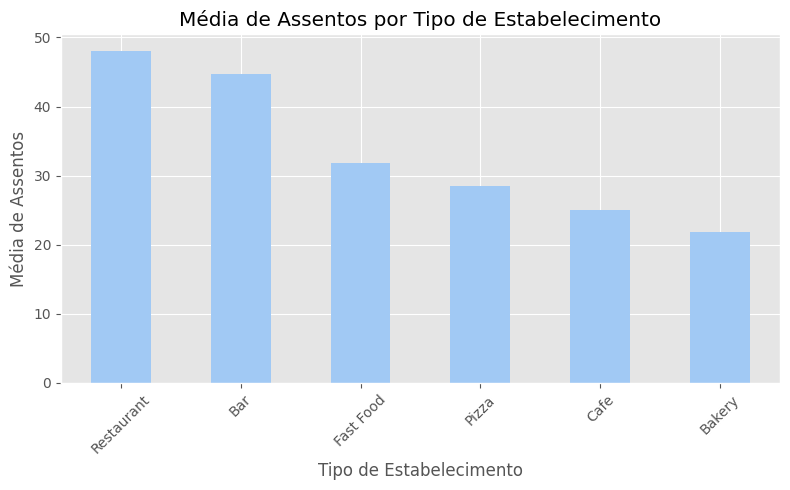

In [11]:
# Calculando a média de assentos por tipo de estabelecimento
avg_seats_by_type = rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False)

# Identificando o tipo com maior média
tipo_maior_media = avg_seats_by_type.index[0]
media_maior = avg_seats_by_type.iloc[0]

# Exibindo resultado
print(f"Tipo com maior média de assentos: {tipo_maior_media} ({media_maior:.1f} assentos)")

# Gerando o gráfico
plt.figure(figsize=(8, 5))
avg_seats_by_type.plot(kind='bar')
plt.title('Média de Assentos por Tipo de Estabelecimento')
plt.ylabel('Média de Assentos')
plt.xlabel('Tipo de Estabelecimento')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">O gráfico mostra claramente como os diferentes tipos se comparam em termos de capacidade.Restaurantes tradicionais não só são os mais comuns, como também têm os maiores espaços em média.<br><br>
<b> Agora, vamos verificar as ruas com maior número de restaurantes e as ruas que têm apenas um restaurante</div>

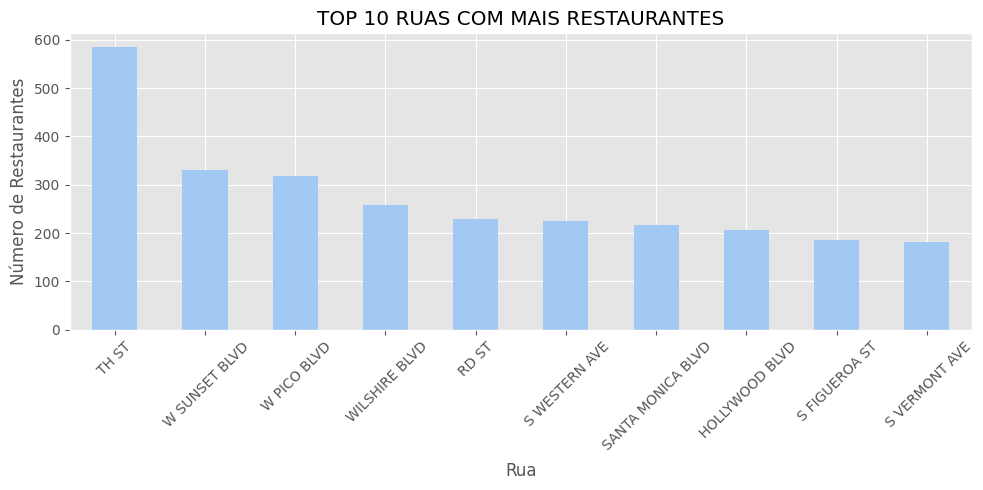

Número de ruas com apenas um restaurante: 339


In [12]:
# Extraindo os nomes das ruas da coluna 'address'
# Procurando padrões como "NOME + TIPO DE RUA (ST, AVE, BLVD, etc)"
rest_data['street'] = rest_data['address'].str.extract(r'([A-Z\s]+\b(?:ST|AVE|BLVD|RD|DR|PL|LN|WAY|CT|CIR|TER|HWY|PKWY))')

# Contando as 10 ruas com mais restaurantes
top_10_streets = rest_data['street'].value_counts().head(10)

# Contar ruas que possuem apenas um restaurante
unique_street = (rest_data['street'].value_counts() == 1).sum()

# Exibir gráfico
plt.figure(figsize=(10, 5))
top_10_streets.plot(kind='bar')
plt.title('TOP 10 RUAS COM MAIS RESTAURANTES')
plt.ylabel('Número de Restaurantes')
plt.xlabel('Rua')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# MostraNDO o total de ruas com apenas um restaurante
print(f"Número de ruas com apenas um restaurante: {unique_street}")

<div class="alert alert-block alert-info"><b>Vamos analisar a distribuição do número de assentos nas ruas com mais restaurantes.<div>

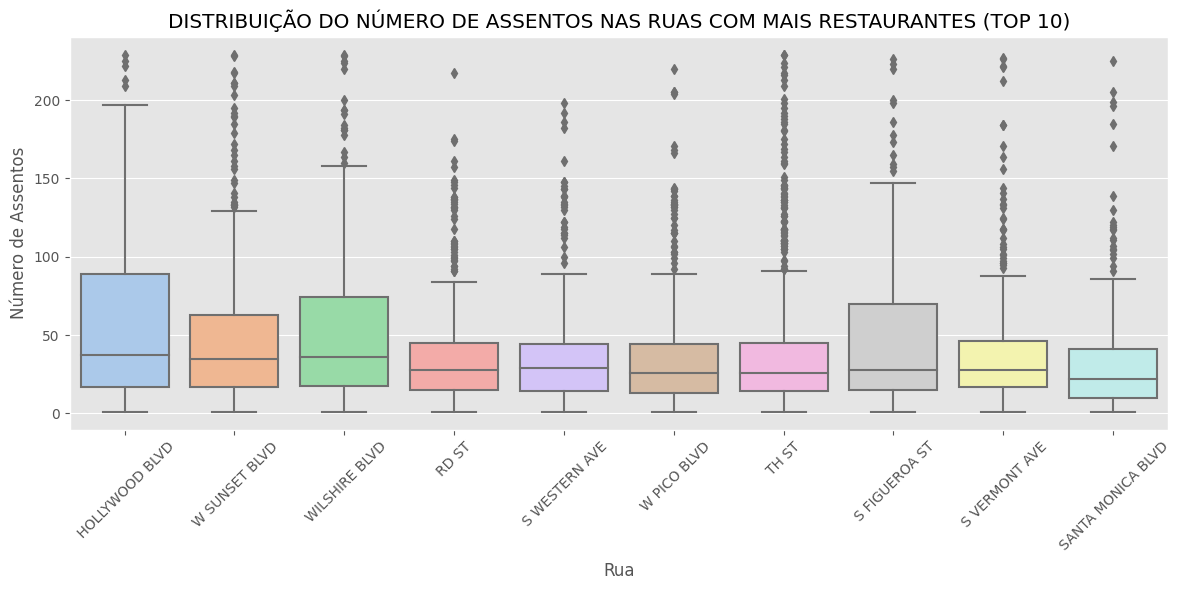

In [13]:
# Selecionando as 10 ruas com mais restaurantes
top_streets = rest_data['street'].value_counts().head(10).index.tolist()

# Filtrar dados apenas dessas ruas
data_top_streets = rest_data[rest_data['street'].isin(top_streets)]

# Criar gráfico de distribuição (boxplot) por rua
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_top_streets, x='street', y='number')
plt.title('DISTRIBUIÇÃO DO NÚMERO DE ASSENTOS NAS RUAS COM MAIS RESTAURANTES (TOP 10)')
plt.xlabel('Rua')
plt.ylabel('Número de Assentos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
As 10 ruas com mais restaurantes apresentam uma grande dispersão de assentos por estabelecimento.<br>
Em todas as ruas, o número de assentos varia de 1 até mais de 220, indicando uma mistura de negócios pequenos e grandes.<br><br>

O boxplot mostra que há valores extremos (outliers) para cima, com restaurantes muito maiores que a média.<br>
Por exemplo: na HOLLYWOOD BLVD, a mediana é 37, mas o máximo chega a 229.<br><br>

A maioria das ruas tem uma mediana de assentos abaixo de 40, sugerindo que os restaurantes são, em geral, de pequeno a médio porte.<br><br>
    
HOLLYWOOD BLVD e WILSHIRE BLVD se destacam<br>
Essas ruas têm as maiores médias de assentos (59 e 54, respectivamente), indicando que atraem ou comportam estabelecimentos maiores.

# 3 - Conclusões

<div class="alert alert-block alert-info">
<b>Tipos de Estabelecimentos</b><br>
O tipo "Restaurant" domina amplamente o mercado (75%), sendo o mais comum tanto entre negócios independentes quanto entre redes.
<br>
Estabelecimentos como Fast Food, Cafe, Pizza e Bar aparecem em menor proporção, sugerindo nichos específicos com menor concorrência, mas também menor volume.

<b>Número de Assentos</b><br>
Restaurantes tradicionais têm a maior média de assentos: cerca de 48 lugares.<br>
A maioria dos estabelecimentos (de todos os tipos) opera com capacidade abaixo de 50 assentos, especialmente em ruas com alta concentração de restaurantes.<br>

<b>Redes</b><br>
Redes representam 38% dos estabelecimentos e são caracterizadas por:<br>
- Maior número de unidades.<br>
- Espaços menores (média de 39 assentos por restaurante)<br>
    
    
O tipo mais comum entre redes também é o "Restaurant",  mostrando que há espaço para escalar esse formato.<br>

<b>Recomendações Estratégicas</b><br>
Parece que abrir um restaurante tradicional pode ser uma escolha segura e dominante, especialmente se for adaptado ao gosto local ou oferecer diferenciais em serviço e experiência.

40 a 50 assentos é uma média inteligente: permite boa rotatividade, sem exigir espaços muito grandes ou caros.<br>

Percebemos que o mercado já comporta uma presença significativa de redes, o que parece demonstrar viabilidade e aceitação desse modelo.<br>

Começar com um espaço enxuto (aproximadamente 40 assentos), com processos padronizados e potencial de expansão, parece ser o caminho mais apropriado.<br>

Priorizar ruas com movimento moderado, onde a concorrência é equilibrada, pode facilitar o crescimento inicial antes de escalar para áreas mais competitivas.<br>

Em relação aos garçons robôs, a tecnologia pode atrair publico no inicio, como diferencial de marketin, mas o negocio deve se sustentar pela
experiencia, qualidade e padronizacao.
    <br>



</div>

# APRESENTAÇÃO

[Acesse a apresentação no Google Drive](https://drive.google.com/file/d/1df7eH4wTWa3MubYmunwxRjju8u1Gm-4H/view?usp=sharing)
